<a href="https://colab.research.google.com/github/samkamau81/Scikit-Learn-ANN/blob/main/Scikit_learn_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Neural Multilayer Perceptron (MLP) with Scikit-learn**


---

## **Regression** 

In [2]:
"""Import the required modules"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [17]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [18]:
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [4]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [5]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)


In [7]:
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7633133194206162


## **Classification**

In [10]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [11]:
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9666666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


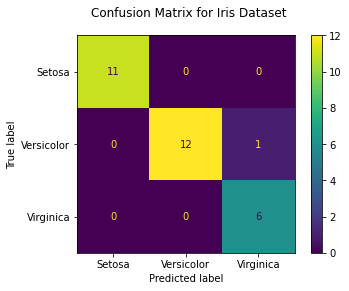

In [14]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()